In [96]:
import numpy as np
import pandas as pd 
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from preprocessing.missing_value_imputation import missing_value_imputation
from preprocessing.train_autoencoder import train_autoencoder
from preprocessing.normalization import normalize_data
from models.autoencoder import Autoencoder
from models.cnn import CNN
from models.multilayerperceptron import MultilayerPerceptron, MultilayerPerceptronForPCA
from helper.evals import precision, recall, f1_score, test_model, train_model, precision_recall_multiclass, prepare_train, train_model_k_fold, prepare_train_k_fold
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from helper.plot_graphs import plot_confusion_matrix, plot_train_and_test_set
from torchsummary import summary
from models.logistic_regression import LogisticRegression

%reload_ext autoreload
%autoreload 2

# Utku Sabri Kaya 504231535
# Haniyeh Dousti 504211557


In [2]:
ov_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/ov_data_dim_red.csv')
rc18flow_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/rc18flow_data_dim_red.csv')
rc18mr_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/rc18mr_data_dim_red.csv')
rc12_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/rc12_data_dim_red.csv')
pdac_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/pdac_data_dim_red.csv')
brca_terunuma_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/brca_terunuma_data_dim_red.csv')
coad_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/coad_data_dim_red.csv')
prad_2019a_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/prad_2019a_data_dim_red.csv')
prad_2019b_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/prad_2019b_data_dim_red.csv')
prad_2014_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/prad_2014_data_dim_red.csv')
hcc_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/hcc_data_dim_red.csv')
dlbcl_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/dlbcl_data_dim_red.csv')
brca_tang_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/brca_tang_data_dim_red.csv')
rc20_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/rc20_data_dim_red.csv')
gbm_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/gbm_data_dim_red.csv')
lica1_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/lica1_data_dim_red.csv')
lica2_data_dim_red = pd.read_csv('edited dataset/preproccessed_data/lica2_data_dim_red.csv')

In [4]:
ov_labels = pd.read_csv('edited dataset/preproccessed_data/ov_labels.csv')
rc18flow_labels = pd.read_csv('edited dataset/preproccessed_data/rc18flow_labels.csv')
rc18mr_labels = pd.read_csv('edited dataset/preproccessed_data/rc18mr_labels.csv')
rc12_labels = pd.read_csv('edited dataset/preproccessed_data/rc12_labels.csv')
pdac_labels = pd.read_csv('edited dataset/preproccessed_data/pdac_labels.csv')
brca_terunuma_labels = pd.read_csv('edited dataset/preproccessed_data/brca_terunuma_labels.csv')
coad_labels = pd.read_csv('edited dataset/preproccessed_data/coad_labels.csv')
prad_2019a_labels = pd.read_csv('edited dataset/preproccessed_data/prad_2019a_labels.csv')
prad_2019b_labels = pd.read_csv('edited dataset/preproccessed_data/prad_2019b_labels.csv')
prad_2014_labels = pd.read_csv('edited dataset/preproccessed_data/prad_2014_labels.csv')
hcc_labels = pd.read_csv('edited dataset/preproccessed_data/hcc_labels.csv')
dlbcl_labels = pd.read_csv('edited dataset/preproccessed_data/dlbcl_labels.csv')
brca_tang_labels = pd.read_csv('edited dataset/preproccessed_data/brca_tang_labels.csv')
rc20_labels = pd.read_csv('edited dataset/preproccessed_data/rc20_labels.csv')
gbm_labels = pd.read_csv('edited dataset/preproccessed_data/gbm_labels.csv')
lica1_labels = pd.read_csv('edited dataset/preproccessed_data/lica1_labels.csv')
lica2_labels = pd.read_csv('edited dataset/preproccessed_data/lica2_labels.csv')

In [4]:
merged_datas = pd.read_csv('edited dataset/preproccessed_data/merged_data_dim_red.csv')
merged_labels = pd.read_csv('edited dataset/preproccessed_data/merged_labels.csv')

In [5]:
merged_data_pca = pd.read_csv('edited dataset/preproccessed_data/merged_data_pca.csv')
merged_data_variance_based = pd.read_csv('edited dataset/preproccessed_data/merged_data_variance_based.csv')

# Train Model With Autoencoder Feature Extraction

In [57]:
model_autoencoder_cnn = CNN(input_size=merged_datas.shape[1] // 4, output_size=11)
model_autoencoder_cnn, train_accs_autoencoder_cnn, train_losses_autoencoder_cnn, train_points_autoencoder_cnn, test_accs_autoencoder_cnn, test_losses_autoencoder_cnn, test_points_autoencoder_cnn = prepare_train_k_fold(model_autoencoder_cnn, merged_datas.values, merged_labels['Labels'].values, reshape_size=merged_datas.shape[1], n_epochs=70)

(790, 1996)
TRAIN:	Epoch:   0, Loss: 2.39704, Accuracy: 3.16456
TEST:	Epoch:   0, Loss: 2.39704, Accuracy: 12.12121
TRAIN:	Epoch:  10, Loss: 2.18144, Accuracy: 22.15190
TEST:	Epoch:  10, Loss: 2.18144, Accuracy: 24.74747
TRAIN:	Epoch:  20, Loss: 2.13969, Accuracy: 22.15190
TEST:	Epoch:  20, Loss: 2.13969, Accuracy: 24.74747
TRAIN:	Epoch:  30, Loss: 1.94875, Accuracy: 28.60759
TEST:	Epoch:  30, Loss: 1.94875, Accuracy: 29.29293
TRAIN:	Epoch:  40, Loss: 1.62867, Accuracy: 52.15190
TEST:	Epoch:  40, Loss: 1.62867, Accuracy: 51.01010
TRAIN:	Epoch:  50, Loss: 1.29850, Accuracy: 51.89873
TEST:	Epoch:  50, Loss: 1.29850, Accuracy: 56.06061
TRAIN:	Epoch:  60, Loss: 1.01115, Accuracy: 61.89873
TEST:	Epoch:  60, Loss: 1.01115, Accuracy: 63.63636
TRAIN:	Epoch:  70, Loss: 0.78379, Accuracy: 67.34177
TEST:	Epoch:  70, Loss: 0.78379, Accuracy: 71.21212
TRAIN:	Epoch:  80, Loss: 0.63735, Accuracy: 75.56962
TEST:	Epoch:  80, Loss: 0.63735, Accuracy: 67.17172
TRAIN:	Epoch:  90, Loss: 0.60577, Accuracy: 

In [22]:
(prad_2019a_data_dim_red).shape
(prad_2019b_data_dim_red).shape
(prad_2014_data_dim_red).shape
coad_data_dim_red.shape
pdac_data_dim_red.shape
rc20_data_dim_red.shape
rc18mr_data_dim_red.shape
brca_terunuma_data_dim_red.shape

(76, 4466)

In [28]:
prad_2019a_labels

,Labels
0,1
1,1
2,1
3,1
4,1
...,...
70,1
71,0
72,1
73,0


In [31]:
datas = [prad_2019a_data_dim_red, coad_data_dim_red, pdac_data_dim_red, rc18mr_data_dim_red, rc20_data_dim_red, brca_terunuma_data_dim_red]
labels = [prad_2019a_labels, coad_labels, pdac_labels, rc18mr_labels, rc20_labels, brca_terunuma_labels]
names = ['PRAD', 'COAD', 'PDAC', 'ccRCC3', 'ccRCC4', 'BRCA']
train_losses_cnn = {}
train_accs_cnn = {}
train_points_cnn = {}
test_losses_cnn = {}
test_accs_cnn = {}
test_points_cnn = {}
models_cnn = {}

train_losses_mlp = {}
train_accs_mlp = {}
train_points_mlp = {}
test_losses_mlp = {}
test_accs_mlp = {}
test_points_mlp = {}
models_mlp = {}


for i in range(len(datas)):
    model_autoencoder_cnn = CNN(input_size=datas[i].shape[1] // 4, output_size=2)
    model_autoencoder_cnn, train_accs_autoencoder_cnn, train_losses_autoencoder_cnn, train_points_autoencoder_cnn, test_accs_autoencoder_cnn, test_losses_autoencoder_cnn, test_points_autoencoder_cnn = prepare_train_k_fold(model_autoencoder_cnn, datas[i].values, labels[i]['Labels'].values, reshape_size=datas[i].shape[1], n_epochs=8)
    train_accs_cnn[names[i]] = train_accs_autoencoder_cnn
    train_losses_cnn[names[i]] = train_losses_autoencoder_cnn
    train_points_cnn[names[i]] = train_points_autoencoder_cnn
    test_accs_cnn[names[i]] = test_accs_autoencoder_cnn
    test_losses_cnn[names[i]] = test_losses_autoencoder_cnn
    test_points_cnn[names[i]] = test_points_autoencoder_cnn
    models_cnn[names[i]] = model_autoencoder_cnn

(60, 4727)
TRAIN:	Epoch:   0, Loss: 0.67328, Accuracy: 66.66667
TEST:	Epoch:   0, Loss: 0.67328, Accuracy: 80.00000
TRAIN:	Epoch:   8, Loss: 0.59262, Accuracy: 75.00000
TEST:	Epoch:   8, Loss: 0.59262, Accuracy: 46.66667
TRAIN:	Epoch:  16, Loss: 0.61050, Accuracy: 68.33333
TEST:	Epoch:  16, Loss: 0.61050, Accuracy: 73.33333
TRAIN:	Epoch:  24, Loss: 0.55125, Accuracy: 70.00000
TEST:	Epoch:  24, Loss: 0.55125, Accuracy: 66.66667
TRAIN:	Epoch:  32, Loss: 0.35246, Accuracy: 83.33333
TEST:	Epoch:  32, Loss: 0.35246, Accuracy: 80.00000
TEST:	Epoch:  39, Loss: 0.20530, Accuracy: 93.33333
(60, 3620)
TRAIN:	Epoch:   0, Loss: 0.69465, Accuracy: 50.00000
TEST:	Epoch:   0, Loss: 0.69465, Accuracy: 56.25000
TRAIN:	Epoch:   8, Loss: 0.66930, Accuracy: 88.52459
TEST:	Epoch:   8, Loss: 0.66930, Accuracy: 53.33333
TRAIN:	Epoch:  16, Loss: 0.44285, Accuracy: 93.44262
TEST:	Epoch:  16, Loss: 0.44285, Accuracy: 80.00000
TRAIN:	Epoch:  24, Loss: 0.24376, Accuracy: 93.44262
TEST:	Epoch:  24, Loss: 0.24376, 

In [99]:

train_losses_logistic_regression = {}
train_accs_logistic_regression = {}
train_points_logistic_regression = {}
test_losses_logistic_regression = {}
test_accs_logistic_regression = {}
test_points_logistic_regression = {}
models_logistic_regression = {}

for i in range(len(datas)):
    model_autoencoder_logistic_regression = LogisticRegression(input_size=datas[i].shape[1], output_size=2)
    model_autoencoder_logistic_regression, train_accs_autoencoder_logistic_regression, train_losses_autoencoder_logistic_regression, train_points_autoencoder_logistic_regression, test_accs_autoencoder_logistic_regression, test_losses_autoencoder_logistic_regression, test_points_autoencoder_logistic_regression = prepare_train_k_fold(model_autoencoder_logistic_regression, datas[i].values, labels[i]['Labels'].values, reshape_size=datas[i].shape[1], n_epochs=8)
    train_accs_logistic_regression[names[i]] = train_accs_autoencoder_logistic_regression
    train_losses_logistic_regression[names[i]] = train_losses_autoencoder_logistic_regression
    train_points_logistic_regression[names[i]] = train_points_autoencoder_logistic_regression
    test_accs_logistic_regression[names[i]] = test_accs_autoencoder_logistic_regression
    test_losses_logistic_regression[names[i]] = test_losses_autoencoder_logistic_regression
    test_points_logistic_regression[names[i]] = test_points_autoencoder_logistic_regression
    models_logistic_regression[names[i]] = model_autoencoder_logistic_regression

(60, 4727)
TRAIN:	Epoch:   0, Loss: 0.72671, Accuracy: 30.00000
TEST:	Epoch:   0, Loss: 0.72671, Accuracy: 66.66667
TRAIN:	Epoch:   8, Loss: 0.51736, Accuracy: 80.00000
TEST:	Epoch:   8, Loss: 0.51736, Accuracy: 80.00000
TRAIN:	Epoch:  16, Loss: 0.40732, Accuracy: 81.66667
TEST:	Epoch:  16, Loss: 0.40732, Accuracy: 93.33333
TRAIN:	Epoch:  24, Loss: 0.32798, Accuracy: 83.33333
TEST:	Epoch:  24, Loss: 0.32798, Accuracy: 86.66667
TRAIN:	Epoch:  32, Loss: 0.28610, Accuracy: 91.66667
TEST:	Epoch:  32, Loss: 0.28610, Accuracy: 100.00000
TEST:	Epoch:  39, Loss: 0.24106, Accuracy: 100.00000
(60, 3620)
TRAIN:	Epoch:   0, Loss: 0.68676, Accuracy: 61.66667
TEST:	Epoch:   0, Loss: 0.68676, Accuracy: 93.75000
TRAIN:	Epoch:   8, Loss: 0.28894, Accuracy: 95.08197
TEST:	Epoch:   8, Loss: 0.28894, Accuracy: 93.33333
TRAIN:	Epoch:  16, Loss: 0.20958, Accuracy: 96.72131
TEST:	Epoch:  16, Loss: 0.20958, Accuracy: 86.66667
TRAIN:	Epoch:  24, Loss: 0.20495, Accuracy: 91.80328
TEST:	Epoch:  24, Loss: 0.20495

In [47]:

for i in range(len(datas)):
    print(datas[i].shape[1])
    model_autoencoder_multilayer_perceptron = MultilayerPerceptron(input_size=datas[i].shape[1], output_size=2)
    model_autoencoder_multilayer_perceptron, train_accs_autoencoder_multilayer_perceptron, train_losses_autoencoder_multilayer_perceptron, train_points_autoencoder_multilayer_perceptron, test_accs_autoencoder_multilayer_perceptron, test_losses_autoencoder_multilayer_perceptron, test_points_autoencoder_multilayer_perceptron = prepare_train_k_fold(model_autoencoder_multilayer_perceptron, datas[i].values, labels[i]['Labels'].values, reshape_size=datas[i].shape[1], n_epochs=4)
    train_accs_mlp[names[i]] = train_accs_autoencoder_multilayer_perceptron
    train_losses_mlp[names[i]] = train_losses_autoencoder_multilayer_perceptron
    train_points_mlp[names[i]] = train_points_autoencoder_multilayer_perceptron
    test_accs_mlp[names[i]] = test_accs_autoencoder_multilayer_perceptron
    test_losses_mlp[names[i]] = test_losses_autoencoder_multilayer_perceptron
    test_points_mlp[names[i]] = test_points_autoencoder_multilayer_perceptron
    models_mlp[names[i]] = model_autoencoder_multilayer_perceptron

4727
(60, 4727)
TRAIN:	Epoch:   0, Loss: 0.72915, Accuracy: 30.00000
TEST:	Epoch:   0, Loss: 0.72915, Accuracy: 66.66667
TRAIN:	Epoch:   4, Loss: 0.59923, Accuracy: 70.00000
TEST:	Epoch:   4, Loss: 0.59923, Accuracy: 66.66667
TRAIN:	Epoch:   8, Loss: 0.55653, Accuracy: 70.00000
TEST:	Epoch:   8, Loss: 0.55653, Accuracy: 66.66667
TRAIN:	Epoch:  12, Loss: 0.50097, Accuracy: 68.33333
TEST:	Epoch:  12, Loss: 0.50097, Accuracy: 73.33333
TRAIN:	Epoch:  16, Loss: 0.40630, Accuracy: 81.66667
TEST:	Epoch:  16, Loss: 0.40630, Accuracy: 80.00000
TEST:	Epoch:  19, Loss: 0.33564, Accuracy: 93.33333
3620
(60, 3620)
TRAIN:	Epoch:   0, Loss: 0.69264, Accuracy: 50.00000
TEST:	Epoch:   0, Loss: 0.69264, Accuracy: 93.75000
TRAIN:	Epoch:   4, Loss: 0.47059, Accuracy: 95.08197
TEST:	Epoch:   4, Loss: 0.47059, Accuracy: 93.33333
TRAIN:	Epoch:   8, Loss: 0.20506, Accuracy: 96.72131
TEST:	Epoch:   8, Loss: 0.20506, Accuracy: 86.66667
TRAIN:	Epoch:  12, Loss: 0.21494, Accuracy: 93.44262
TEST:	Epoch:  12, Loss:

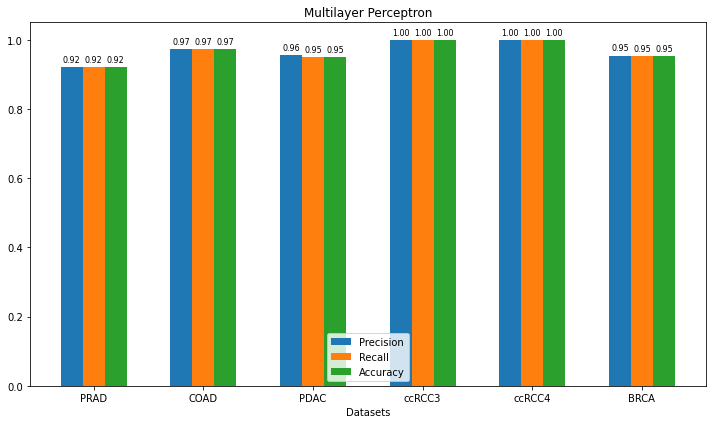

In [48]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision_scores = []
recall_scores = []
accuracy_scores = []

def evaluate_model(model, data, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        precision = precision_score(labels.numpy(), predicted.numpy(), average='weighted')
        recall = recall_score(labels.numpy(), predicted.numpy(), average='weighted')
        accuracy = accuracy_score(labels.numpy(), predicted.numpy())
    return precision, recall, accuracy

# Evaluate each model
for i, name in enumerate(names):
    model = models_mlp[name]
    data = torch.tensor(datas[i].values, dtype=torch.float32)  # Convert dataframe to tensor
    label = torch.tensor(labels[i].values, dtype=torch.long)   # Convert labels to tensor
    precision, recall, accuracy = evaluate_model(model, data, label)
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
# Plotting the results
x = np.arange(len(names))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, accuracy_scores, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Datasets')
# ax.set_ylabel('Scores')
ax.set_title('Multilayer Perceptron')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

[autoreload of models.multilayerperceptron failed: Traceback (most recent call last):
  File "/Users/utku/anaconda3/envs/metaboliticsenv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/utku/anaconda3/envs/metaboliticsenv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/utku/anaconda3/envs/metaboliticsenv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/utku/anaconda3/envs/metaboliticsenv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/Users/utku/anaconda3/envs/metaboliticsenv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 276, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]


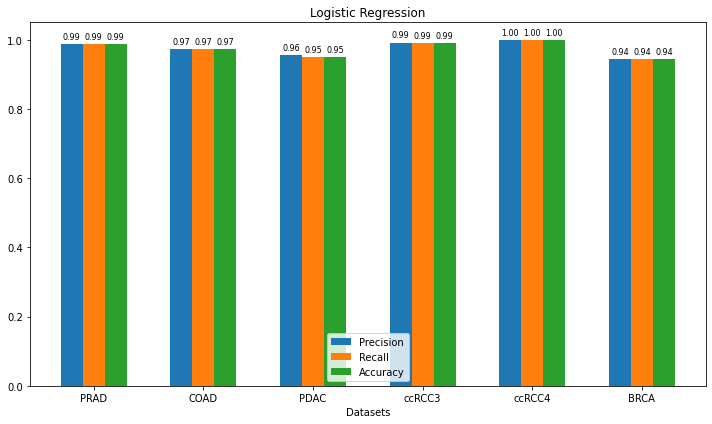

In [101]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision_scores = []
recall_scores = []
accuracy_scores = []

def evaluate_model(model, data, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        precision = precision_score(labels.numpy(), predicted.numpy(), average='weighted')
        recall = recall_score(labels.numpy(), predicted.numpy(), average='weighted')
        accuracy = accuracy_score(labels.numpy(), predicted.numpy())
    return precision, recall, accuracy

# Evaluate each model
for i, name in enumerate(names):
    model = models_logistic_regression[name]
    data = torch.tensor(datas[i].values, dtype=torch.float32)  # Convert dataframe to tensor
    label = torch.tensor(labels[i].values, dtype=torch.long)   # Convert labels to tensor
    precision, recall, accuracy = evaluate_model(model, data, label)
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
# Plotting the results
x = np.arange(len(names))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, accuracy_scores, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Datasets')
# ax.set_ylabel('Scores')
ax.set_title('Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

torch.Size([75, 1, 4727])
torch.Size([76, 1, 3620])
torch.Size([39, 1, 3468])
torch.Size([114, 1, 4428])
torch.Size([76, 1, 4466])
torch.Size([108, 1, 3572])


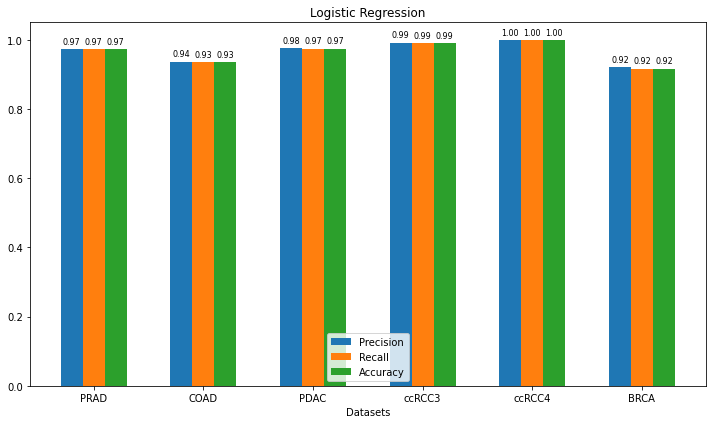

In [52]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision_scores = []
recall_scores = []
accuracy_scores = []

def evaluate_model(model, data, labels):
    model.eval()
    with torch.no_grad():
        print(data.shape)
        outputs = model.forward(data)
        _, predicted = torch.max(outputs, 1)
        precision = precision_score(labels.numpy(), predicted.numpy(), average='weighted')
        recall = recall_score(labels.numpy(), predicted.numpy(), average='weighted')
        accuracy = accuracy_score(labels.numpy(), predicted.numpy())
    return precision, recall, accuracy

# Evaluate each model
for i, name in enumerate(names):
    model = models_cnn[name]
    data = torch.tensor(datas[i].values.reshape(int(len(datas[i])), 1, datas[i].shape[1]), dtype=torch.float32)
    label = torch.tensor(labels[i].values, dtype=torch.long)   # Convert labels to tensor
    precision, recall, accuracy = evaluate_model(model, data, label)
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
# Plotting the results
x = np.arange(len(names))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, accuracy_scores, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Datasets')
# ax.set_ylabel('Scores')
ax.set_title('CNN')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

In [11]:
train_accs_cnn

{'PRAD': [73.33333333333333,
  73.33333333333333,
  26.666666666666668,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  70.0,
  70.0,
  70.0,
  70.0,
  70.0,
  70.0,
  70.0,
  70.0,
  70.0,
  70.0,
  66.66666666666666,
  66.66666666666666,
  66.66666666666666,
  66.66666666666666,
  66.66666666666666,
  66.66666666666666,
  66.66666666666666,
  66.66666666666666,
  66.66666666666666,
  66.66666666666666,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  73.33333333333333,
  63.33333333333333,
  63.33333333333333,
  71.66666666666667,
  91.66666666666666,
  65.0,
  63.33333333333333,
  63.33333333333333,
  65.0,
  91.66666666666666,
  93.33333333333333],
 'COAD': [51.66666666666667,
  51.66666666666667,
  48.333333333333336,
  51.66666666666667,
  4

In [39]:
# prad_2019a_merged_data # PRAD
# prad_2019b_merged_data # PRAD 
# prad_2014_merged_data # PRAD
# coad_merged_data # COAD
# pdac_merged_data # PDAC
# rc20_merged_data # ccRCC4
# rc18mr_merged_data # ccRCC3
# brca_terunuma_merged_data # BRCA1

model_autoencoder_cnn = CNN(input_size=prad_2019a_data_dim_red.shape[1] // 4, output_size=2)
model_autoencoder_cnn, train_accs_autoencoder_cnn, train_losses_autoencoder_cnn, train_points_autoencoder_cnn, test_accs_autoencoder_cnn, test_losses_autoencoder_cnn, test_points_autoencoder_cnn = prepare_train_k_fold(model_autoencoder_cnn, prad_2019a_data_dim_red.values, prad_2019a_labels['Labels'].values, reshape_size=prad_2019a_data_dim_red.shape[1], n_epochs=1)

(60, 4727)
TRAIN:	Epoch:   0, Loss: 0.69493, Accuracy: 31.66667
TEST:	Epoch:   0, Loss: 0.69493, Accuracy: 73.33333
TRAIN:	Epoch:   1, Loss: 0.59053, Accuracy: 73.33333
TEST:	Epoch:   1, Loss: 0.59053, Accuracy: 53.33333
TRAIN:	Epoch:   2, Loss: 0.68600, Accuracy: 68.33333
TEST:	Epoch:   2, Loss: 0.68600, Accuracy: 73.33333
TRAIN:	Epoch:   3, Loss: 0.67713, Accuracy: 66.66667
TEST:	Epoch:   3, Loss: 0.67713, Accuracy: 80.00000
TRAIN:	Epoch:   4, Loss: 0.61353, Accuracy: 70.00000
TEST:	Epoch:   4, Loss: 0.61353, Accuracy: 66.66667


In [53]:
model_autoencoder_multilayer_perceptron = MultilayerPerceptron(input_size=merged_datas.shape[1], output_size=11)
model_autoencoder_multilayer_perceptron, train_accs_autoencoder_multilayer_perceptron, train_losses_autoencoder_multilayer_perceptron, train_points_autoencoder_multilayer_perceptron, test_accs_autoencoder_multilayer_perceptron, test_losses_autoencoder_multilayer_perceptron, test_points_autoencoder_multilayer_perceptron = prepare_train_k_fold(model_autoencoder_multilayer_perceptron, merged_datas.values, merged_labels['Labels'].values, reshape_size=merged_datas.shape[1], n_epochs=70)

NameError: name 'merged_datas' is not defined

# Train Model With PCA

In [60]:
model_pca_cnn = CNN(input_size=merged_data_pca.shape[1] // 4, output_size=11)
model_pca_cnn, train_accs_pca_cnn, train_losses_pca_cnn, train_points_pca_cnn, test_accs_pca_cnn, test_losses_pca_cnn, test_points_pca_cnn = prepare_train_k_fold(model_pca_cnn, merged_data_pca.values, merged_labels['Labels'].values, reshape_size=merged_data_pca.shape[1], n_epochs=70)

(790, 100)
TRAIN:	Epoch:   0, Loss: 2.41908, Accuracy: 9.24051
TEST:	Epoch:   0, Loss: 2.41908, Accuracy: 28.78788
TRAIN:	Epoch:  10, Loss: 1.20098, Accuracy: 69.62025
TEST:	Epoch:  10, Loss: 1.20098, Accuracy: 66.16162
TRAIN:	Epoch:  20, Loss: 0.52424, Accuracy: 69.49367
TEST:	Epoch:  20, Loss: 0.52424, Accuracy: 76.76768
TRAIN:	Epoch:  30, Loss: 0.34147, Accuracy: 84.43038
TEST:	Epoch:  30, Loss: 0.34147, Accuracy: 84.34343
TRAIN:	Epoch:  40, Loss: 0.27754, Accuracy: 83.79747
TEST:	Epoch:  40, Loss: 0.27754, Accuracy: 84.84848
TRAIN:	Epoch:  50, Loss: 0.24889, Accuracy: 86.83544
TEST:	Epoch:  50, Loss: 0.24889, Accuracy: 85.35354
TRAIN:	Epoch:  60, Loss: 0.23688, Accuracy: 87.21519
TEST:	Epoch:  60, Loss: 0.23688, Accuracy: 88.88889
TRAIN:	Epoch:  70, Loss: 0.23165, Accuracy: 87.21519
TEST:	Epoch:  70, Loss: 0.23165, Accuracy: 90.40404
TRAIN:	Epoch:  80, Loss: 0.22390, Accuracy: 87.34177
TEST:	Epoch:  80, Loss: 0.22390, Accuracy: 89.39394
TRAIN:	Epoch:  90, Loss: 0.21818, Accuracy: 8

In [62]:
model_pca_multilayer_perceptron = MultilayerPerceptronForPCA(input_size=merged_data_pca.shape[1], output_size=11)
model_pca_multilayer_perceptron, train_accs_pca_multilayer_perceptron, train_losses_pca_multilayer_perceptron, train_points_pca_multilayer_perceptron, test_accs_pca_multilayer_perceptron, test_losses_pca_multilayer_perceptron, test_points_pca_multilayer_perceptron = prepare_train_k_fold(model_pca_multilayer_perceptron, merged_data_pca.values, merged_labels['Labels'].values, reshape_size=merged_data_pca.shape[1], n_epochs=70)

(790, 100)
TRAIN:	Epoch:   0, Loss: 2.32082, Accuracy: 14.30380
TEST:	Epoch:   0, Loss: 2.32082, Accuracy: 12.62626
TRAIN:	Epoch:  10, Loss: 1.75648, Accuracy: 70.00000
TEST:	Epoch:  10, Loss: 1.75648, Accuracy: 61.11111
TRAIN:	Epoch:  20, Loss: 1.23991, Accuracy: 76.32911
TEST:	Epoch:  20, Loss: 1.23991, Accuracy: 69.19192
TRAIN:	Epoch:  30, Loss: 0.83746, Accuracy: 77.84810
TEST:	Epoch:  30, Loss: 0.83746, Accuracy: 73.73737
TRAIN:	Epoch:  40, Loss: 0.58218, Accuracy: 79.11392
TEST:	Epoch:  40, Loss: 0.58218, Accuracy: 74.74747
TRAIN:	Epoch:  50, Loss: 0.43487, Accuracy: 80.75949
TEST:	Epoch:  50, Loss: 0.43487, Accuracy: 81.31313
TRAIN:	Epoch:  60, Loss: 0.34759, Accuracy: 86.70886
TEST:	Epoch:  60, Loss: 0.34759, Accuracy: 88.38384
TRAIN:	Epoch:  70, Loss: 0.30573, Accuracy: 88.98734
TEST:	Epoch:  70, Loss: 0.30573, Accuracy: 82.32323
TRAIN:	Epoch:  80, Loss: 0.26021, Accuracy: 88.48101
TEST:	Epoch:  80, Loss: 0.26021, Accuracy: 81.81818
TRAIN:	Epoch:  90, Loss: 0.23656, Accuracy: 

# Train Model With Variance-Based

In [63]:
model_variance_based_cnn = CNN(input_size=merged_data_variance_based.shape[1] // 4, output_size=11)
model_variance_based_cnn, train_accs_variance_based_cnn, train_losses_variance_based_cnn, train_points_variance_based_cnn, test_accs_variance_based_cnn, test_losses_variance_based_cnn, test_points_variance_based_cnn = prepare_train_k_fold(model_variance_based_cnn, merged_data_variance_based.values, merged_labels['Labels'].values, reshape_size=merged_data_variance_based.shape[1], n_epochs=70)

(790, 1258)
TRAIN:	Epoch:   0, Loss: 2.38146, Accuracy: 17.84810
TEST:	Epoch:   0, Loss: 2.38146, Accuracy: 19.69697
TRAIN:	Epoch:  10, Loss: 1.78212, Accuracy: 44.05063
TEST:	Epoch:  10, Loss: 1.78212, Accuracy: 38.88889
TRAIN:	Epoch:  20, Loss: 1.18168, Accuracy: 52.91139
TEST:	Epoch:  20, Loss: 1.18168, Accuracy: 49.49495
TRAIN:	Epoch:  30, Loss: 0.80319, Accuracy: 60.63291
TEST:	Epoch:  30, Loss: 0.80319, Accuracy: 71.71717
TRAIN:	Epoch:  40, Loss: 0.64548, Accuracy: 70.00000
TEST:	Epoch:  40, Loss: 0.64548, Accuracy: 67.67677
TRAIN:	Epoch:  50, Loss: 0.53044, Accuracy: 73.79747
TEST:	Epoch:  50, Loss: 0.53044, Accuracy: 71.71717
TRAIN:	Epoch:  60, Loss: 0.46554, Accuracy: 78.22785
TEST:	Epoch:  60, Loss: 0.46554, Accuracy: 70.20202
TRAIN:	Epoch:  70, Loss: 0.42853, Accuracy: 79.36709
TEST:	Epoch:  70, Loss: 0.42853, Accuracy: 74.74747
TRAIN:	Epoch:  80, Loss: 0.40066, Accuracy: 78.86076
TEST:	Epoch:  80, Loss: 0.40066, Accuracy: 76.26263
TRAIN:	Epoch:  90, Loss: 0.39177, Accuracy:

In [64]:
model_variance_based_multilayer_perceptron = MultilayerPerceptron(input_size=merged_data_variance_based.shape[1], output_size=11)
model_variance_based_multilayer_perceptron, train_accs_variance_based_multilayer_perceptron, train_losses_variance_based_multilayer_perceptron, train_points_variance_based_multilayer_perceptron, test_accs_variance_based_multilayer_perceptron, test_losses_variance_based_multilayer_perceptron, test_points_variance_based_multilayer_perceptron = prepare_train_k_fold(model_variance_based_multilayer_perceptron, merged_data_variance_based.values, merged_labels['Labels'].values, reshape_size=merged_data_variance_based.shape[1], n_epochs=70)

(790, 1258)
TRAIN:	Epoch:   0, Loss: 2.36821, Accuracy: 4.68354
TEST:	Epoch:   0, Loss: 2.36821, Accuracy: 32.32323
TRAIN:	Epoch:  10, Loss: 1.40767, Accuracy: 50.50633
TEST:	Epoch:  10, Loss: 1.40767, Accuracy: 42.92929
TRAIN:	Epoch:  20, Loss: 0.94258, Accuracy: 68.73418
TEST:	Epoch:  20, Loss: 0.94258, Accuracy: 65.65657
TRAIN:	Epoch:  30, Loss: 0.63909, Accuracy: 71.26582
TEST:	Epoch:  30, Loss: 0.63909, Accuracy: 73.23232
TRAIN:	Epoch:  40, Loss: 0.49806, Accuracy: 77.34177
TEST:	Epoch:  40, Loss: 0.49806, Accuracy: 70.20202
TRAIN:	Epoch:  50, Loss: 0.43186, Accuracy: 77.84810
TEST:	Epoch:  50, Loss: 0.43186, Accuracy: 69.19192
TRAIN:	Epoch:  60, Loss: 0.39956, Accuracy: 77.84810
TEST:	Epoch:  60, Loss: 0.39956, Accuracy: 68.68687
TRAIN:	Epoch:  70, Loss: 0.43021, Accuracy: 77.46835
TEST:	Epoch:  70, Loss: 0.43021, Accuracy: 77.27273
TRAIN:	Epoch:  80, Loss: 0.39351, Accuracy: 76.32911
TEST:	Epoch:  80, Loss: 0.39351, Accuracy: 84.84848
TRAIN:	Epoch:  90, Loss: 0.41804, Accuracy: 

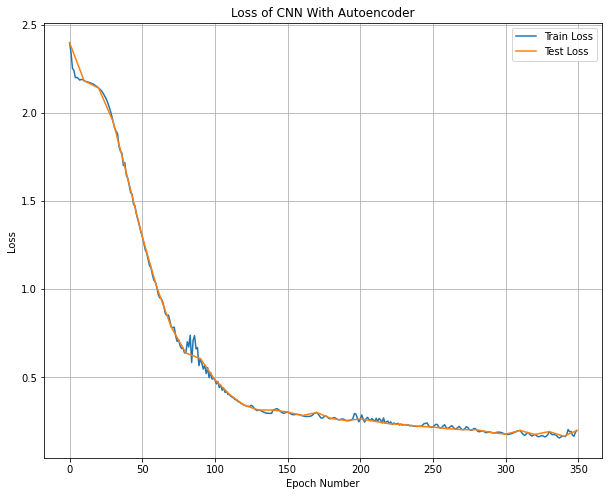

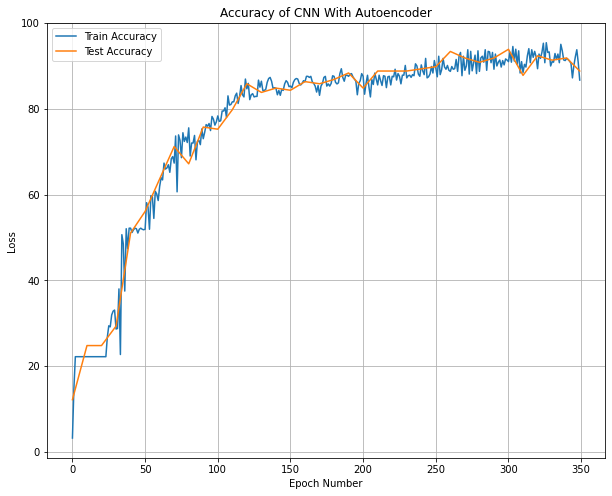

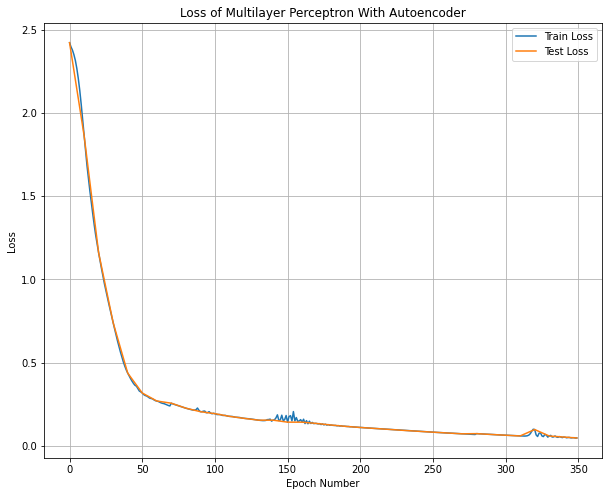

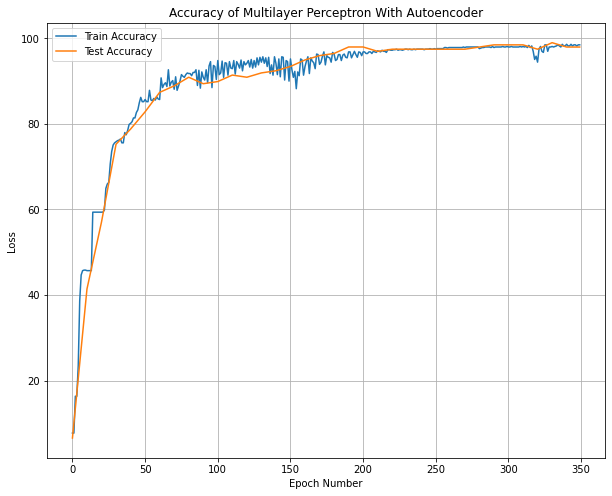

In [65]:
plot_train_and_test_set(train_losses_autoencoder_cnn, test_losses_autoencoder_cnn, test_points_autoencoder_cnn, label_train_data='Train Loss', label_test_data='Test Loss', title='Loss of CNN With Autoencoder', file_path='Figures/loss_of_cnn_autoencoder.jpg')
plot_train_and_test_set(train_accs_autoencoder_cnn, test_accs_autoencoder_cnn, test_points_autoencoder_cnn, label_train_data='Train Accuracy', label_test_data='Test Accuracy', title='Accuracy of CNN With Autoencoder', file_path='Figures/accuracy_of_cnn_autoencoder.jpg')

plot_train_and_test_set(train_losses_autoencoder_multilayer_perceptron, test_losses_autoencoder_multilayer_perceptron, test_points_autoencoder_multilayer_perceptron, label_train_data='Train Loss', label_test_data='Test Loss', title='Loss of Multilayer Perceptron With Autoencoder', file_path='Figures/loss_of_multilayer_perceptron_autoencoder.jpg')
plot_train_and_test_set(train_accs_autoencoder_multilayer_perceptron, test_accs_autoencoder_multilayer_perceptron, test_points_autoencoder_multilayer_perceptron, label_train_data='Train Accuracy', label_test_data='Test Accuracy', title='Accuracy of Multilayer Perceptron With Autoencoder', file_path='Figures/accuracy_of_multilayer_perceptron_autoencoder.jpg')


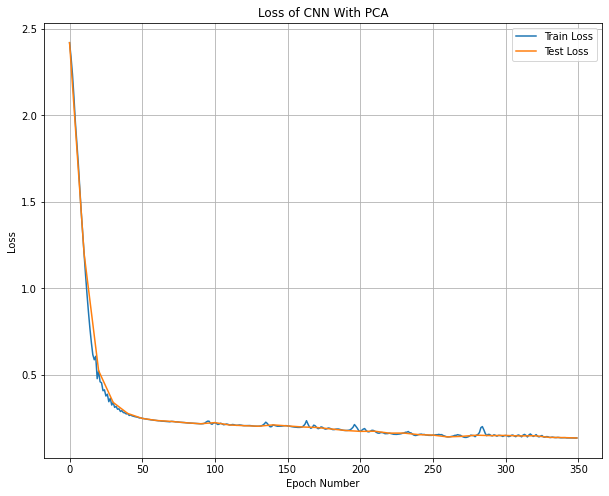

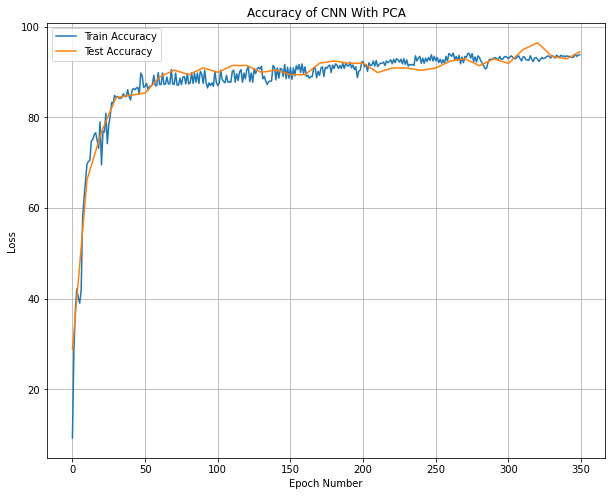

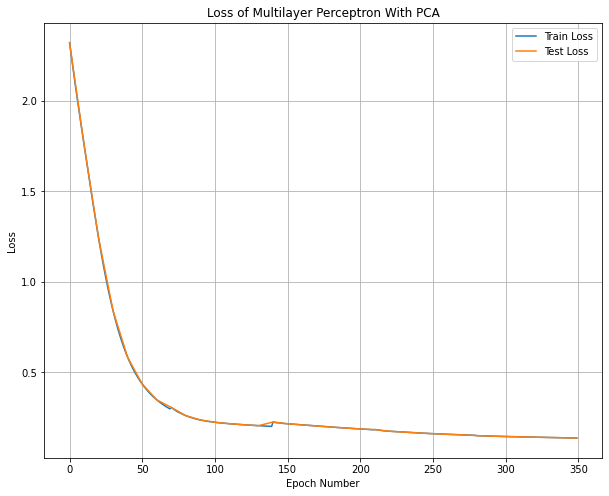

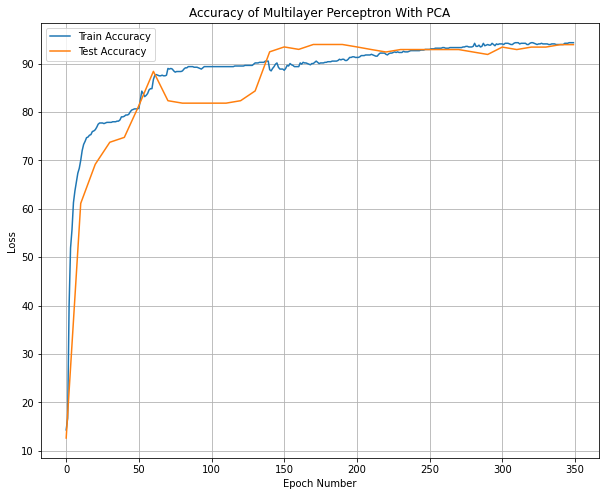

In [66]:
plot_train_and_test_set(train_losses_pca_cnn, test_losses_pca_cnn, test_points_pca_cnn, label_train_data='Train Loss', label_test_data='Test Loss', title='Loss of CNN With PCA', file_path='Figures/loss_of_cnn_pca.jpg')
plot_train_and_test_set(train_accs_pca_cnn, test_accs_pca_cnn, test_points_pca_cnn, label_train_data='Train Accuracy', label_test_data='Test Accuracy', title='Accuracy of CNN With PCA', file_path='Figures/accuracy_of_cnn_pca.jpg')

plot_train_and_test_set(train_losses_pca_multilayer_perceptron, test_losses_pca_multilayer_perceptron, test_points_pca_multilayer_perceptron, label_train_data='Train Loss', label_test_data='Test Loss', title='Loss of Multilayer Perceptron With PCA', file_path='Figures/loss_of_multilayer_perceptron_pca.jpg')
plot_train_and_test_set(train_accs_pca_multilayer_perceptron, test_accs_pca_multilayer_perceptron, test_points_pca_multilayer_perceptron, label_train_data='Train Accuracy', label_test_data='Test Accuracy', title='Accuracy of Multilayer Perceptron With PCA', file_path='Figures/accuracy_of_multilayer_perceptron_pca.jpg')


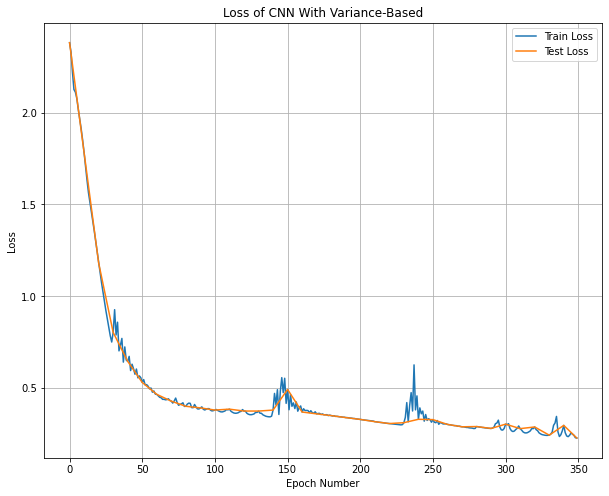

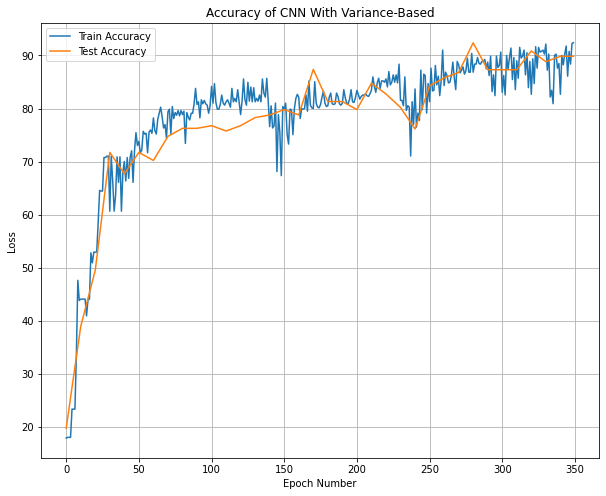

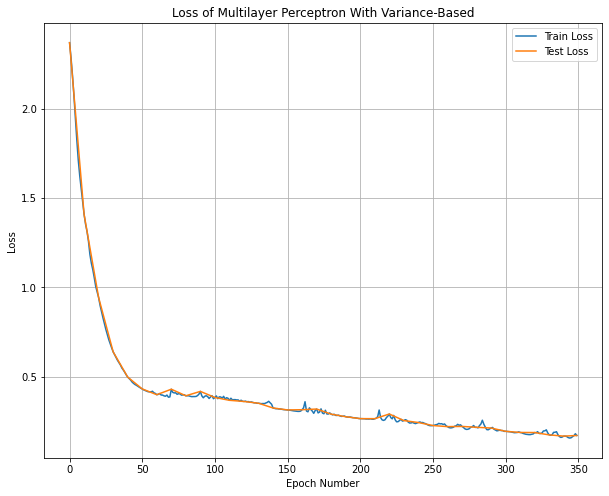

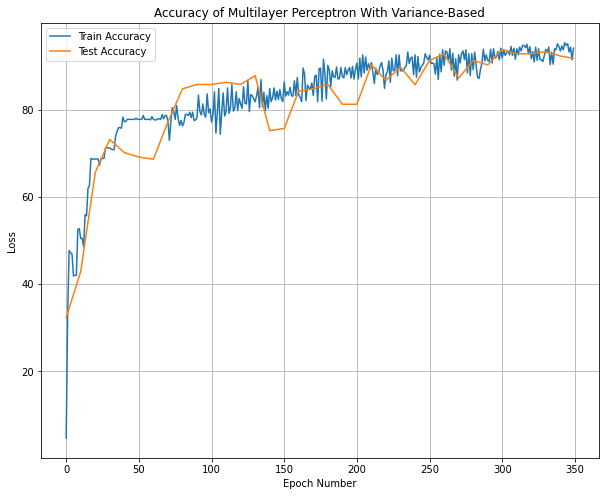

In [67]:
plot_train_and_test_set(train_losses_variance_based_cnn, test_losses_variance_based_cnn, test_points_variance_based_cnn, label_train_data='Train Loss', label_test_data='Test Loss', title='Loss of CNN With Variance-Based', file_path='Figures/loss_of_cnn_variance_based.jpg')
plot_train_and_test_set(train_accs_variance_based_cnn, test_accs_variance_based_cnn, test_points_variance_based_cnn, label_train_data='Train Accuracy', label_test_data='Test Accuracy',  title='Accuracy of CNN With Variance-Based', file_path='Figures/accuracy_of_cnn_variance_based.jpg')

plot_train_and_test_set(train_losses_variance_based_multilayer_perceptron, test_losses_variance_based_multilayer_perceptron, test_points_variance_based_multilayer_perceptron, label_train_data='Train Loss', label_test_data='Test Loss', title='Loss of Multilayer Perceptron With Variance-Based', file_path='Figures/loss_of_multilayer_perceptron_variance_based.jpg')
plot_train_and_test_set(train_accs_variance_based_multilayer_perceptron, test_accs_variance_based_multilayer_perceptron, test_points_variance_based_multilayer_perceptron, label_train_data='Train Accuracy', label_test_data='Test Accuracy', title='Accuracy of Multilayer Perceptron With Variance-Based', file_path='Figures/accuracy_of_multilayer_perceptron_variance_based.jpg')



# Save Model

In [68]:
torch.save(model_autoencoder_cnn.state_dict(), 'trained_models/cnn_model_with_autoencoder.pth')
torch.save(model_autoencoder_multilayer_perceptron.state_dict(), 'trained_models/multilayer_perceptron_model_with_autoencoder.pth')

In [69]:
torch.save(model_pca_cnn.state_dict(), 'trained_models/cnn_model_with_pca.pth')
torch.save(model_pca_multilayer_perceptron.state_dict(), 'trained_models/multilayer_perceptron_model_with_pca.pth')

In [70]:
torch.save(model_variance_based_cnn.state_dict(), 'trained_models/cnn_model_with_variance_based.pth')
torch.save(model_variance_based_multilayer_perceptron.state_dict(), 'trained_models/multilayer_perceptron_model_with_variance_based.pth')

# Models Summary

In [71]:
# summary(model_autoencoder_cnn, input_size=(1, 1996))
# summary(model_autoencoder_multilayer_perceptron, input_size=(1, 1996))
# summary(model_pca_cnn, input_size=(1, 100))
# summary(model_pca_multilayer_perceptron, input_size=(1, 100))
# summary(model_variance_based_cnn, input_size=(1, 1258))
summary(model_variance_based_multilayer_perceptron, input_size=(1, 1258))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         644,608
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 128]          65,664
              ReLU-4                  [-1, 128]               0
            Linear-5                   [-1, 32]           4,128
              ReLU-6                   [-1, 32]               0
            Linear-7                   [-1, 11]             363
Total params: 714,763
Trainable params: 714,763
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.73
Estimated Total Size (MB): 2.74
----------------------------------------------------------------


# Load Model

In [20]:
trained_cnn_model = CNN(input_size=merged_datas.shape[1] // 4, output_size=11)
trained_cnn_model.load_state_dict(torch.load('trained_models/cnn_model_with_autoencoder.pth'))
trained_cnn_model.eval()

CNN(
  (conv_layers): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): ReLU()
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=15968, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=11, bias=True)
  )
)

# PCA

In [23]:
merged_datas_imputted = pd.read_csv('edited dataset/imputted_merged_data.csv')

In [24]:
identifier_df = pd.read_csv('edited dataset/identifier_df.csv')
label_names = ['Normal', 'OV', 'RC', 'PDAC', 'BRCA', 'COAD', 'PRAD', 'HCC', 'DLBCL', 'GBM', 'LiCa'] 


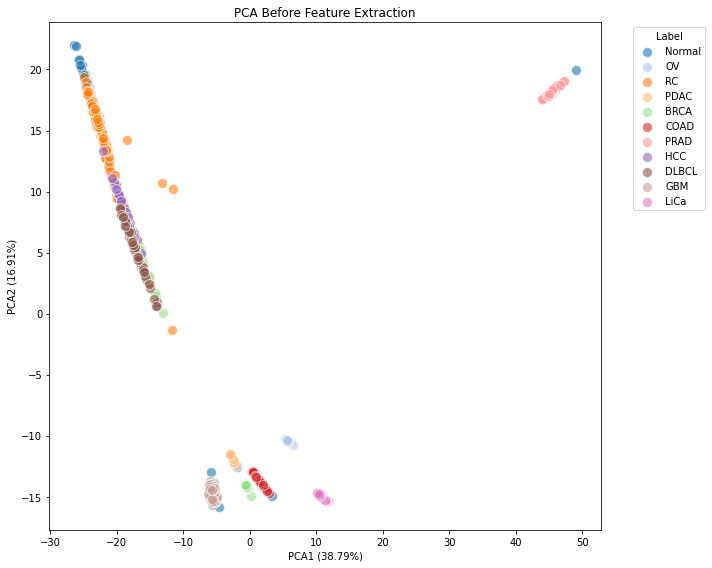

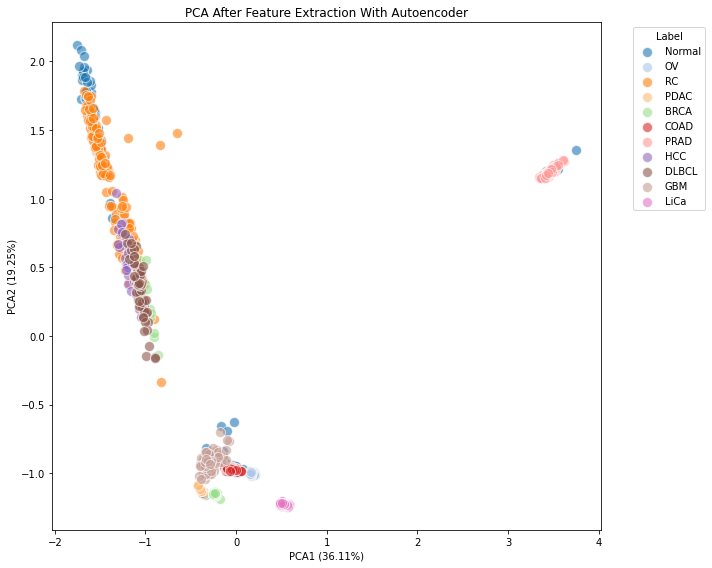

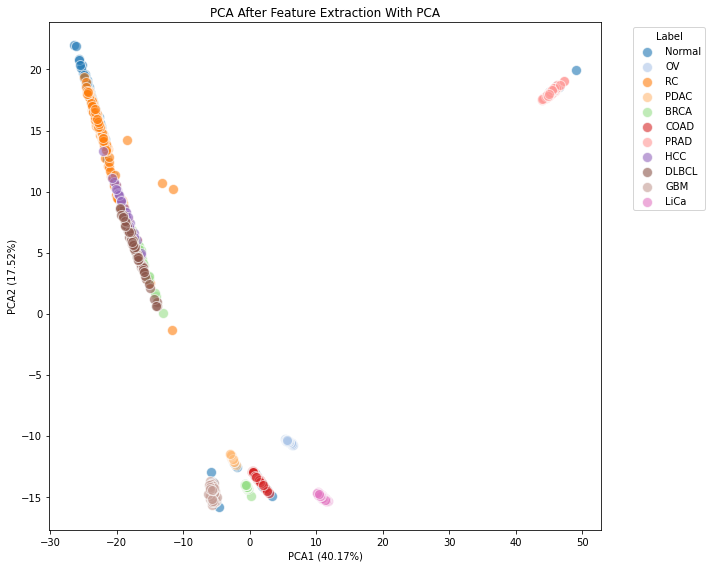

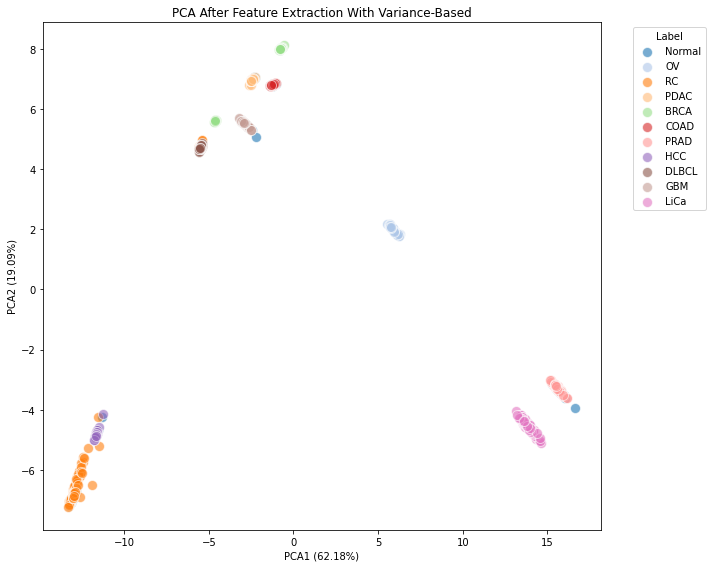

In [25]:
def pca_and_plot(data, labels, label_names, title='', file_path=None):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    pca_df['Label'] = labels['Labels'].values

    plt.figure(figsize=(10, 8))

    colors = plt.cm.get_cmap('tab20', 17)
    unique_labels = sorted(labels['Labels'].unique())
    for i, label in enumerate(unique_labels):
        plt.scatter(
            pca_df[pca_df['Label'] == label]['PCA1'],
            pca_df[pca_df['Label'] == label]['PCA2'],
            color=colors(i),
            label=label_names[i],
            alpha=0.6,
            edgecolors='w',
            s=100
        )

    explained_variance_ratio = pca.explained_variance_ratio_

    plt.title(title)
    plt.xlabel(f'PCA1 ({explained_variance_ratio[0]*100:.2f}%)')
    plt.ylabel(f'PCA2 ({explained_variance_ratio[1]*100:.2f}%)')

    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    if(file_path != None):
        plt.savefig(file_path)
    plt.show()


pca_and_plot(merged_datas_imputted, merged_labels, label_names, title='PCA Before Feature Extraction', file_path='Figures/pca_before_feature_extraction.jpg')

pca_and_plot(merged_datas, merged_labels, label_names, title='PCA After Feature Extraction With Autoencoder', file_path='Figures/pca_after_feature_extraction_with_autoencoder.jpg')

pca_and_plot(merged_data_pca, merged_labels, label_names, title='PCA After Feature Extraction With PCA', file_path='Figures/pca_after_feature_extraction_with_pca.jpg')

pca_and_plot(merged_data_variance_based, merged_labels, label_names, title='PCA After Feature Extraction With Variance-Based', file_path='Figures/pca_after_feature_extraction_with_variance_based.jpg')


# Confusion Matrix

In [72]:
actual_classes = merged_labels['Labels'].values
classes = np.unique(actual_classes)


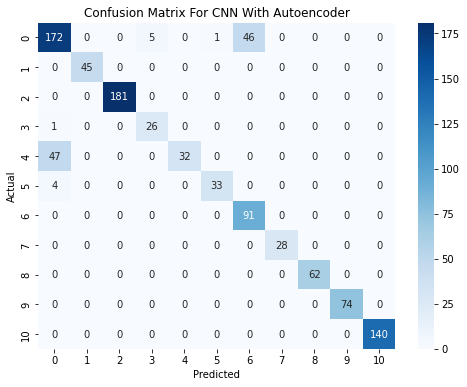

In [73]:
y_pred = test_model(model_autoencoder_cnn, merged_datas)
y_pred = y_pred.detach().numpy()
plot_confusion_matrix(y_actual=actual_classes, y_prediction=y_pred, classes=classes, title='Confusion Matrix For CNN With Autoencoder', file_path='Figures/confusion_matrix_with_cnn_autoencoder.jpg')

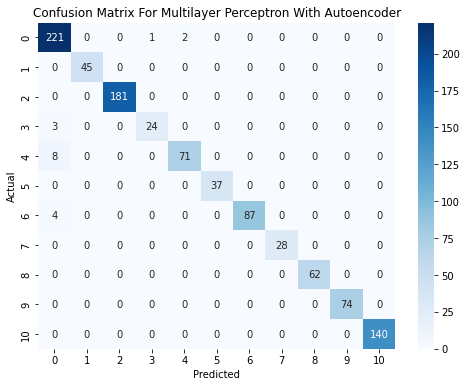

In [74]:
y_pred = test_model(model_autoencoder_multilayer_perceptron, merged_datas)
y_pred = y_pred.detach().numpy()
plot_confusion_matrix(y_actual=actual_classes, y_prediction=y_pred, classes=classes, title='Confusion Matrix For Multilayer Perceptron With Autoencoder', file_path='Figures/confusion_matrix_with_multilayer_perceptron_autoencoder.jpg')

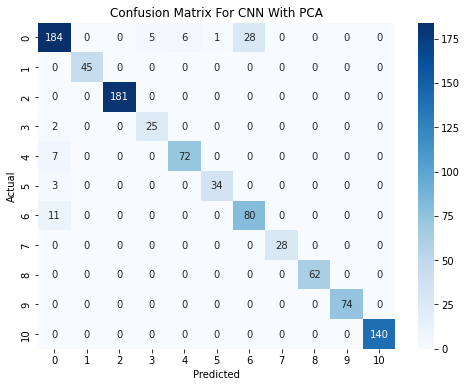

In [75]:
y_pred = test_model(model_pca_cnn, merged_data_pca)
y_pred = y_pred.detach().numpy()
plot_confusion_matrix(y_actual=actual_classes, y_prediction=y_pred, classes=classes, title='Confusion Matrix For CNN With PCA', file_path='Figures/confusion_matrix_with_cnn_pca.jpg')

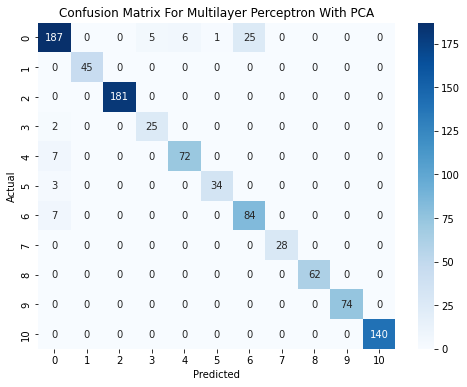

In [76]:
y_pred = test_model(model_pca_multilayer_perceptron, merged_data_pca)
y_pred = y_pred.detach().numpy()
plot_confusion_matrix(y_actual=actual_classes, y_prediction=y_pred, classes=classes, title='Confusion Matrix For Multilayer Perceptron With PCA', file_path='Figures/confusion_matrix_with_multilayer_perceptron_pca.jpg')

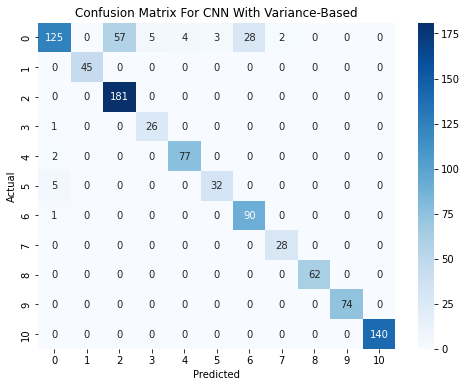

In [77]:
y_pred = test_model(model_variance_based_cnn, merged_data_variance_based)
y_pred = y_pred.detach().numpy()
plot_confusion_matrix(y_actual=actual_classes, y_prediction=y_pred, classes=classes, title='Confusion Matrix For CNN With Variance-Based', file_path='Figures/confusion_matrix_with_cnn_variance_based.jpg')

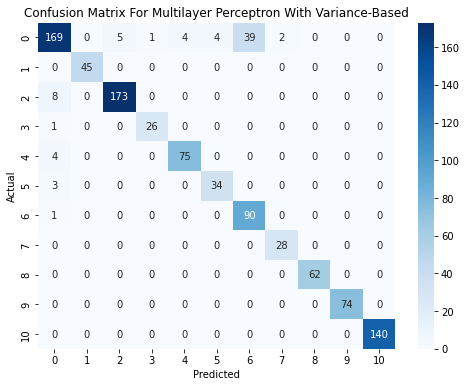

In [78]:
y_pred = test_model(model_variance_based_multilayer_perceptron, merged_data_variance_based)
y_pred = y_pred.detach().numpy()
plot_confusion_matrix(y_actual=actual_classes, y_prediction=y_pred, classes=classes, title='Confusion Matrix For Multilayer Perceptron With Variance-Based', file_path='Figures/confusion_matrix_with_multilayer_perceptron_variance_based.jpg')

In [79]:
y_pred = test_model(model_autoencoder_cnn, merged_datas)
y_pred = y_pred.detach().numpy()

print("Autoencoder CNN")

precision_autoencoder_cnn_macro, recall_autoencoder_cnn_macro, f1_score_autoencoder_cnn_macro = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='macro')
print("Macro Precision:", precision_autoencoder_cnn_macro)
print("Macro Recall:", recall_autoencoder_cnn_macro)
print("Macro F1 Score:", f1_score_autoencoder_cnn_macro)


precision_autoencoder_cnn_weighted, recall_autoencoder_cnn_weighted, f1_score_autoencoder_cnn_weighted = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='weighted')
print("Weighted Precision:", precision_autoencoder_cnn_weighted)
print("Weighted Recall:", recall_autoencoder_cnn_weighted)
print("Weighted F1 Score:", f1_score_autoencoder_cnn_weighted)

Autoencoder CNN
Macro Precision: 0.9310353302011773
Macro Recall: 0.9116159353501125
Macro F1 Score: 0.90625532021777
Weighted Precision: 0.9109333820553213
Weighted Recall: 0.8947368421052632
Weighted F1 Score: 0.8894647400563256


In [80]:

y_pred = test_model(model_autoencoder_multilayer_perceptron, merged_datas)
y_pred = y_pred.detach().numpy()

print("Autoencoder Multilayer Perceptron")

precision_autoencoder_multilayer_perceptron_macro, recall_autoencoder_multilayer_perceptron_macro, f1_score_autoencoder_multilayer_perceptron_macro = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='macro')
print("Macro Precision:", precision_autoencoder_multilayer_perceptron_macro)
print("Macro Recall:", recall_autoencoder_multilayer_perceptron_macro)
print("Macro F1 Score:", f1_score_autoencoder_multilayer_perceptron_macro)

precision_autoencoder_multilayer_perceptron_weighted, recall_autoencoder_multilayer_perceptron_weighted, f1_score_autoencoder_multilayer_perceptron_weighted = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='weighted')
print("Weighted Precision:", precision_autoencoder_multilayer_perceptron_weighted)
print("Weighted Recall:", recall_autoencoder_multilayer_perceptron_weighted)
print("Weighted F1 Score:", f1_score_autoencoder_multilayer_perceptron_weighted)


Autoencoder Multilayer Perceptron
Macro Precision: 0.98809485615383
Macro Recall: 0.9754794695459252
Macro F1 Score: 0.981425918590704
Weighted Precision: 0.9823060003064402
Weighted Recall: 0.9817813765182186
Weighted F1 Score: 0.9816958980673028


In [81]:

y_pred = test_model(model_pca_cnn, merged_data_pca)
y_pred = y_pred.detach().numpy()

print("PCA CNN")

precision_pca_cnn_macro, recall_pca_cnn_macro, f1_score_pca_cnn_macro = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='macro')
print("Macro Precision:", precision_pca_cnn_macro)
print("Macro Recall:", recall_pca_cnn_macro)
print("Macro F1 Score:", f1_score_pca_cnn_macro)

precision_pca_cnn_weighted, recall_pca_cnn_weighted, f1_score_pca_cnn_weighted = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='weighted')
print("Weighted Precision:", precision_pca_cnn_weighted)
print("Weighted Recall:", recall_pca_cnn_weighted)
print("Weighted F1 Score:", f1_score_pca_cnn_weighted)

PCA CNN
Macro Precision: 0.9415880415880415
Macro Recall: 0.9506169727688715
Macro F1 Score: 0.9451530259906271
Weighted Precision: 0.9391543042352759
Weighted Recall: 0.9362348178137652
Weighted F1 Score: 0.9367516431638176


In [82]:

y_pred = test_model(model_pca_multilayer_perceptron, merged_data_pca)
y_pred = y_pred.detach().numpy()

print("PCA Multilayer Perceptron")

precision_pca_multilayer_perceptron_macro, recall_pca_multilayer_perceptron_macro, f1_score_pca_multilayer_perceptron_macro = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='macro')
print("Macro Precision:", precision_pca_multilayer_perceptron_macro)
print("Macro Recall:", recall_pca_multilayer_perceptron_macro)
print("Macro F1 Score:", f1_score_pca_multilayer_perceptron_macro)

precision_pca_multilayer_perceptron_weighted, recall_pca_multilayer_perceptron_weighted, f1_score_pca_multilayer_perceptron_weighted = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='weighted')
print("Weighted Precision:", precision_pca_multilayer_perceptron_weighted)
print("Weighted Recall:", recall_pca_multilayer_perceptron_weighted)
print("Weighted F1 Score:", f1_score_pca_multilayer_perceptron_weighted)

PCA Multilayer Perceptron
Macro Precision: 0.946022547269541
Macro Recall: 0.955830509232408
Macro F1 Score: 0.94987293827185
Weighted Precision: 0.9461884415568312
Weighted Recall: 0.9433198380566802
Weighted F1 Score: 0.9436793124226914


In [83]:

y_pred = test_model(model_variance_based_cnn, merged_data_variance_based)
y_pred = y_pred.detach().numpy()

print("Variance Based CNN")

precision_variance_based_cnn_macro, recall_variance_based_cnn_macro, f1_score_variance_based_cnn_macro = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='macro')
print("Macro Precision:", precision_variance_based_cnn_macro)
print("Macro Recall:", recall_variance_based_cnn_macro)
print("Macro F1 Score:", f1_score_variance_based_cnn_macro)

precision_variance_based_cnn_weighted, recall_variance_based_cnn_weighted, f1_score_variance_based_cnn_weighted = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='weighted')
print("Weighted Precision:", precision_variance_based_cnn_weighted)
print("Weighted Recall:", recall_variance_based_cnn_weighted)
print("Weighted F1 Score:", f1_score_variance_based_cnn_weighted)

Variance Based CNN
Macro Precision: 0.9175452632701813
Macro Recall: 0.9408689159480299
Macro F1 Score: 0.9215443372485216
Weighted Precision: 0.9055861290790908
Weighted Recall: 0.8906882591093117
Weighted F1 Score: 0.8829378980282757


In [84]:

y_pred = test_model(model_variance_based_multilayer_perceptron, merged_data_variance_based)
y_pred = y_pred.detach().numpy()

print("Variance Based Multilayer Perceptron")

precision_variance_based_multilayer_perceptron_macro, recall_variance_based_multilayer_perceptron_macro, f1_score_variance_based_multilayer_perceptron_macro = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='macro')
print("Macro Precision:", precision_variance_based_multilayer_perceptron_macro)
print("Macro Recall:", recall_variance_based_multilayer_perceptron_macro)
print("Macro F1 Score:", f1_score_variance_based_multilayer_perceptron_macro)

precision_variance_based_multilayer_perceptron_weighted, recall_variance_based_multilayer_perceptron_weighted, f1_score_variance_based_multilayer_perceptron_weighted = precision_recall_multiclass(y_actual=actual_classes, y_prediction=y_pred, average='weighted')
print("Weighted Precision:", precision_variance_based_multilayer_perceptron_weighted)
print("Weighted Recall:", recall_variance_based_multilayer_perceptron_weighted)
print("Weighted F1 Score:", f1_score_variance_based_multilayer_perceptron_weighted)

Variance Based Multilayer Perceptron
Macro Precision: 0.938053355319181
Macro Recall: 0.9573204863806478
Macro F1 Score: 0.9446249384124044
Weighted Precision: 0.9353943123904455
Weighted Recall: 0.9271255060728745
Weighted F1 Score: 0.9272720566449724


In [85]:
precision_scores_macro = [
    precision_autoencoder_cnn_macro,
    precision_autoencoder_multilayer_perceptron_macro,
    precision_pca_cnn_macro,
    precision_pca_multilayer_perceptron_macro,
    precision_variance_based_cnn_macro,
    precision_autoencoder_multilayer_perceptron_macro
    ]

precision_scores_weighted = [
    precision_autoencoder_cnn_weighted,
    precision_autoencoder_multilayer_perceptron_weighted,
    precision_pca_cnn_weighted,
    precision_pca_multilayer_perceptron_weighted,
    precision_variance_based_cnn_weighted,
    precision_autoencoder_multilayer_perceptron_weighted
    ]

recall_scores_macro = [
    recall_autoencoder_cnn_macro,
    recall_autoencoder_multilayer_perceptron_macro,
    recall_pca_cnn_macro,
    recall_pca_multilayer_perceptron_macro,
    recall_variance_based_cnn_macro,
    recall_variance_based_multilayer_perceptron_macro
]

recall_scores_weighted = [
    recall_autoencoder_cnn_weighted,
    recall_autoencoder_multilayer_perceptron_weighted,
    recall_pca_cnn_weighted,
    recall_pca_multilayer_perceptron_weighted,
    recall_variance_based_cnn_weighted,
    recall_variance_based_multilayer_perceptron_weighted
]

f1_scores_macro = [
    f1_score_autoencoder_cnn_macro,
    f1_score_autoencoder_multilayer_perceptron_macro,
    f1_score_pca_cnn_macro,
    f1_score_pca_multilayer_perceptron_macro,
    f1_score_variance_based_cnn_macro,
    f1_score_variance_based_multilayer_perceptron_macro
]

f1_scores_weighted = [
    f1_score_autoencoder_cnn_weighted,
    f1_score_autoencoder_multilayer_perceptron_weighted,
    f1_score_pca_cnn_weighted,
    f1_score_pca_multilayer_perceptron_weighted,
    f1_score_variance_based_cnn_weighted,
    f1_score_variance_based_multilayer_perceptron_weighted
]

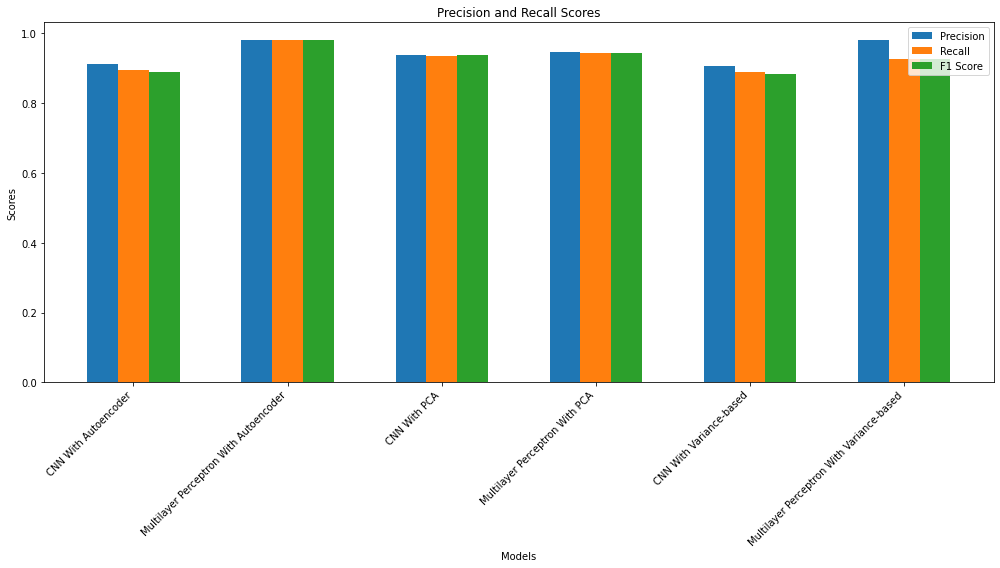

In [86]:
model_names = [
    "CNN With Autoencoder",
    "Multilayer Perceptron With Autoencoder",
    "CNN With PCA",
    "Multilayer Perceptron With PCA",
    "CNN With Variance-based",
    "Multilayer Perceptron With Variance-based"
]

bar_width = 0.2
indices = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(indices - bar_width, precision_scores_weighted, bar_width, label='Precision')
ax.bar(indices, recall_scores_weighted, bar_width, label='Recall')
ax.bar(indices + bar_width, f1_scores_weighted, bar_width, label='F1 Score')


ax.set_xticks(indices)
ax.set_xticklabels(model_names, rotation=45, ha='right')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Scores')

ax.legend()

plt.tight_layout()
plt.savefig('Figures/precision_recall.jpg')

plt.show()